In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Dir = '/OPGD_model/'
PFT_tag = ['01-ENF', '02-EBF', '03-DNF', '04-DBF', '05-MF',
          '07-SHR', '09-SAV', '10-GRA', '11-WET', '12-CRO']
PFT_label = ['ENF', 'EBF', 'DNF', 'DBF', 'MF',
            'SHR', 'SAV', 'GRA', 'WET', 'CRO']
PFT_num = [777, 3578, 557, 282, 2949, 8477, 5559, 5742, 219, 4128] 
        # obtained from file (Dir + 'MODIS_Topt.csv')

In [3]:
# read csv
test_size = 20
smp_times = 200
df = pd.read_csv(Dir + 'test_sz=%r_smp_tm=%r.csv'%(test_size, smp_times))
df  # 10 PFTs x 200 samples = 2000 lines

,Unnamed: 0,vegtype,slope
0,0,01-ENF,0.814201
1,1,01-ENF,0.916100
2,2,01-ENF,0.711389
3,3,01-ENF,0.796105
4,4,01-ENF,0.729857
...,...,...,...
1995,1995,12-CRO,0.808149
1996,1996,12-CRO,0.795574
1997,1997,12-CRO,0.922919
1998,1998,12-CRO,0.811474


In [81]:
df_all = pd.read_csv(Dir + 'test_sz=%r_smp_tm=%r_all.csv'%(test_size, smp_times),
                     usecols=[1,2])
llb, lb, median, ub, uub = df_all['Slope'].quantile([.1, .25, .5, .75, .9])
print(llb, lb, median, ub, uub)
# mean R2
df_all['R2'].mean(), df_all['R2'].median()

0.5075281427568378 0.5495379500679476 0.600961622142171 0.6608765773148978 0.6957190452988723


(0.7888360157219871, 0.8049394195029542)

In [90]:
df_grouped = df[['vegtype','slope']].groupby('vegtype').quantile([.25, .5, .75])

In [92]:
df_grouped.loc[('01-ENF', 0.25), 'slope']

0.6444145923115997

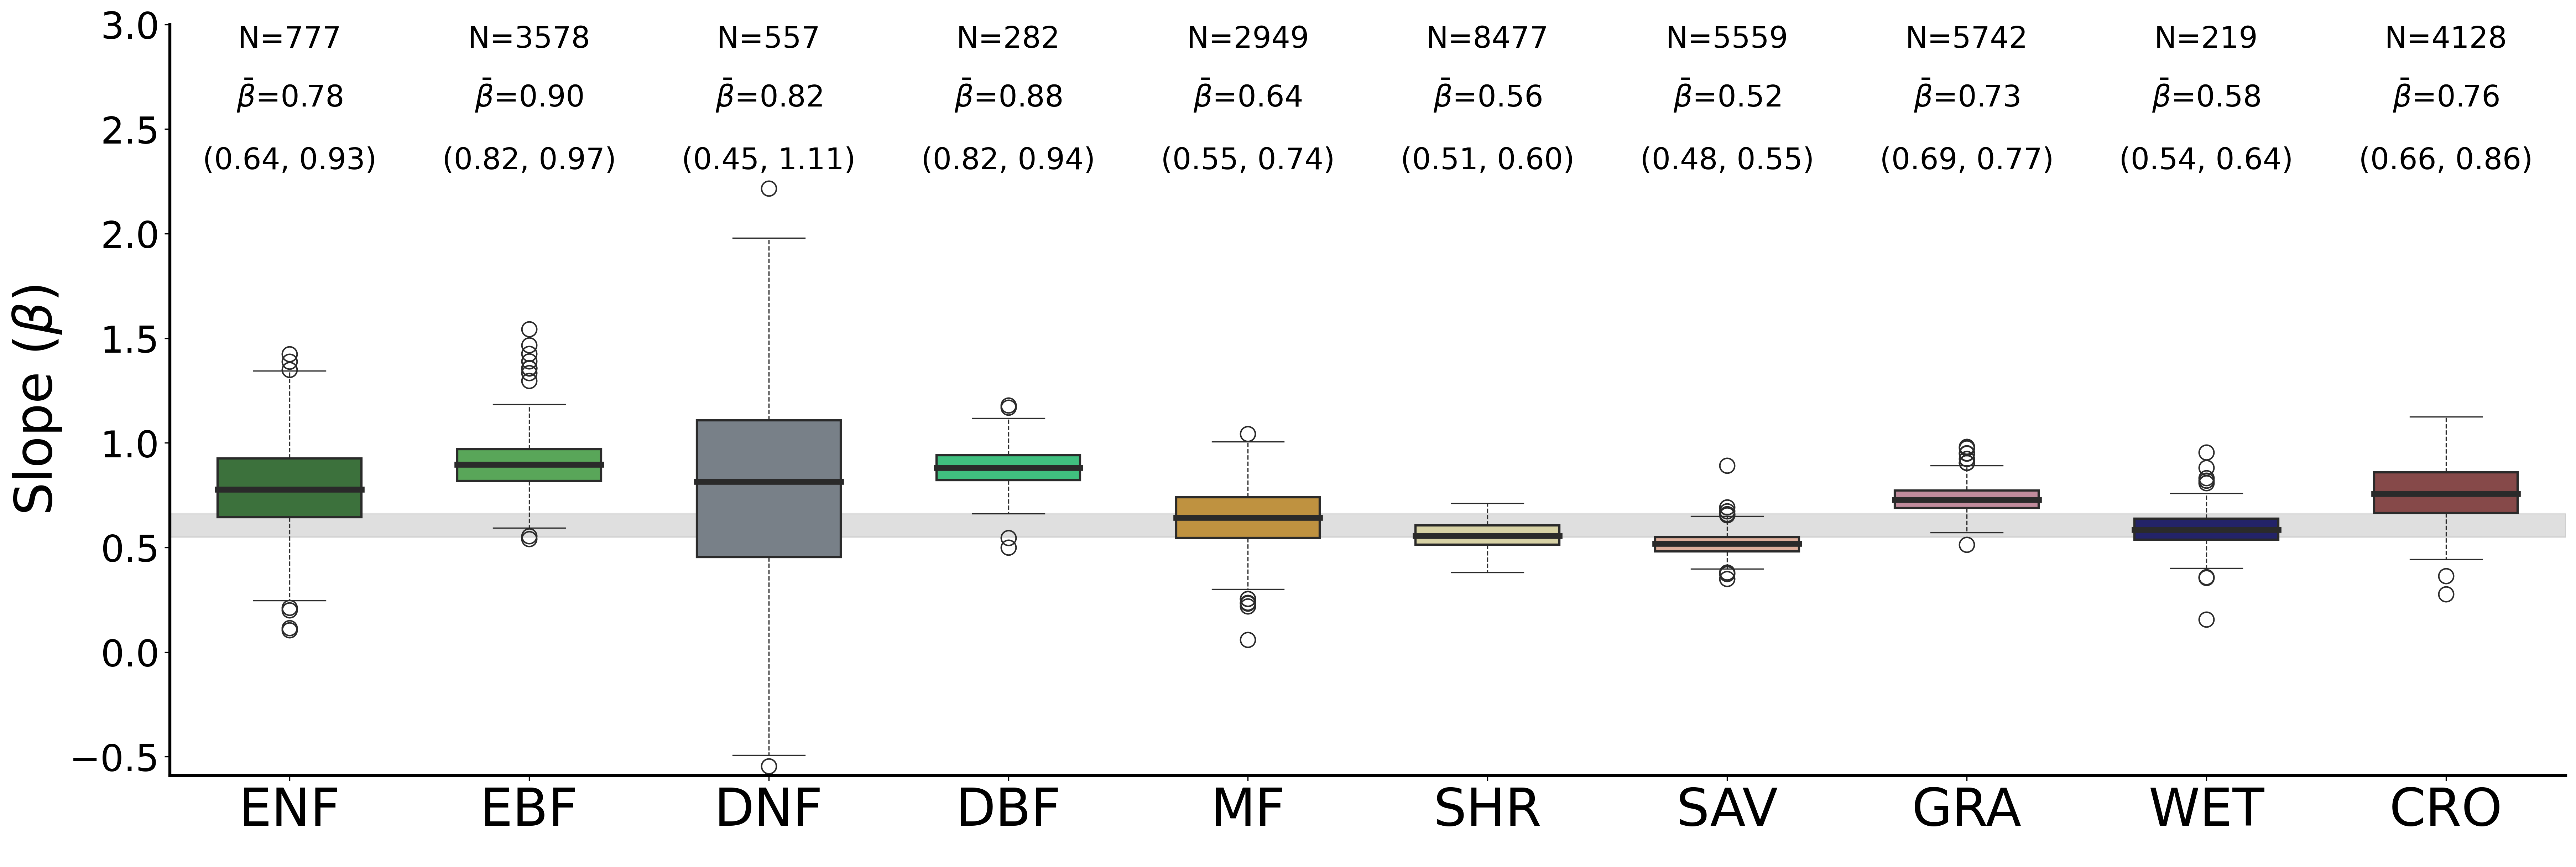

In [99]:
COLOR_TYPE = ['forestgreen', 'limegreen', 'slategrey','springgreen', 'orange', 'khaki',
                'lightsalmon', 'palevioletred', 'darkblue','brown']

fig, ax = plt.subplots(figsize=(24,8),
                        dpi=300,
                        layout='constrained')
x_fb = np.arange(11)-.5
y_zeros = np.zeros(11)
ax.fill_between(x_fb, y1=lb+y_zeros, y2=ub+y_zeros, zorder=0,
                color='silver', alpha=.5)

ax = sns.boxplot(data=df, x="vegtype", y="slope",
        palette=COLOR_TYPE,
        width=.6,
        capwidths=.3,
        saturation=0.5,
        ax=ax,
        medianprops = {"linewidth": 4},
        whiskerprops = {"linestyle": 'dashed',
                        "lw": 0.8},
        flierprops = {"marker": "o",
                    "markersize": "10",
                    "mfc": 'None'},
        capprops = {"lw": 0.8},
        )

ax.xaxis.set_tick_params(labelsize=35)
ax.yaxis.set_tick_params(labelsize=25)
ax.set_xticklabels(PFT_label)
ax.set_xlabel(" ")
ax.set_ylabel(r"Slope ($\beta$)", fontsize=35)
ax.set_ylim(-0.59, 3)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# add text (sample size)
for i in range(10):
    # obatin median slope & 25th/75th
    median = df_grouped.loc[(PFT_tag[i], 0.5), 'slope']
    q25 = df_grouped.loc[(PFT_tag[i], 0.25), 'slope']
    q75 = df_grouped.loc[(PFT_tag[i], 0.75), 'slope']
    # N
    ax.text(i, 3., "N=%d"%PFT_num[i], 
            ha='center', va='top',
            fontsize=20)
    ax.text(i, 2.75, r"$\bar{\beta}$=%.2f"%median,
            #r"$\bar{\beta}$=%.2f (%.2f, %.2f)"%(median,q25,q75),
            ha='center', va='top',
            fontsize=20)
    ax.text(i, 2.42, r"(%.2f, %.2f)"%(q25,q75),
            ha='center', va='top',
            fontsize=20)